##Skin Cancer MNIST Classification using CNN

**Description:** Implementing the CNN model for image classification.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']="/content/drive/MyDrive/Kaggle"

In [ ]:
#importing the dataset from kaggle using google drive
!kaggle datasets download -d kmader/skin-cancer-mnist-ham10000
!ls
!unzip skin-cancer-mnist-ham10000.zip

Streaming output truncated to the last 5000 lines.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: h

In [ ]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import keras
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from PIL import Image
np.random.seed(123)
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [ ]:
os.listdir('/content')

['.config',
 'ham10000_images_part_2',
 'ham10000_images_part_1',
 'hmnist_8_8_L.csv',
 'skin-cancer-mnist-ham10000.zip',
 'hmnist_8_8_RGB.csv',
 'HAM10000_images_part_2',
 'drive',
 'HAM10000_images_part_1',
 'hmnist_28_28_RGB.csv',
 'HAM10000_metadata.csv',
 'hmnist_28_28_L.csv',
 'sample_data']

**Making the dictionary of images and labels**

In [ ]:
##Creating the base directory
base_dir = 'base_dir'
os.mkdir(base_dir)

##Joining the base directory and train
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)
 
##Joining the base directory and validation 
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)
 
# creating the new folders inside train_dir
nv = os.path.join(train_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(train_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(train_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(train_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(train_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(train_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(train_dir, 'df')
os.mkdir(df)
 
 
# creating the  new folders inside val_dir
nv = os.path.join(val_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(val_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(val_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(val_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(val_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(val_dir, 'vasc')
os.mkdir(vasc)
df = os.path.join(val_dir, 'df')
os.mkdir(df)

**Reading and processing the data**

In [ ]:
##reading  the csv by joining the path of image folder
df = pd.read_csv('../content/HAM10000_metadata.csv')

base_skin_dir = os.path.join('..', 'content')

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
# Creating New Columns for better readability

df['path'] = df['image_id'].map(imageid_path_dict.get)
df['cell_type'] = df['dx'].map(lesion_type_dict.get) 
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes

df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../content/HAM10000_images_part_1/ISIC_0027419...,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../content/HAM10000_images_part_1/ISIC_0025030...,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../content/HAM10000_images_part_1/ISIC_0026769...,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../content/HAM10000_images_part_1/ISIC_0025661...,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../content/HAM10000_images_part_2/ISIC_0031633...,Benign keratosis-like lesions,2


###Visualizing the data

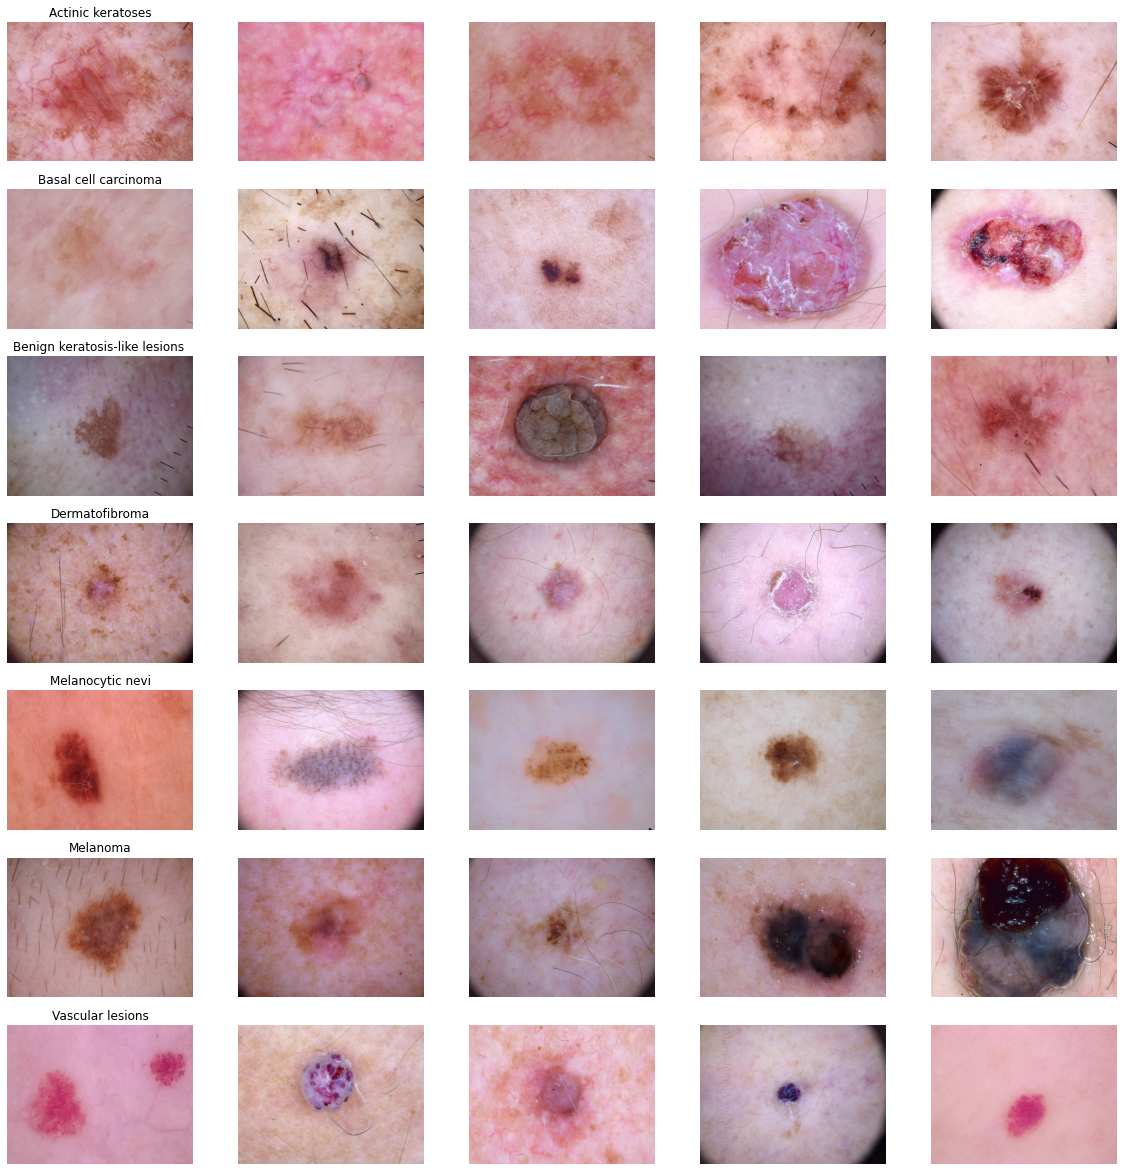

In [ ]:
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x)))

# Sample images
n_samples = 5
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=500)

###Cleaning the data

In [ ]:
df.isnull().sum()

lesion_id         0
image_id          0
dx                0
dx_type           0
age              57
sex               0
localization      0
path              0
cell_type         0
cell_type_idx     0
image             0
dtype: int64

In [ ]:
df['age'].fillna((df['age'].mean()), inplace=True)
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age              0
sex              0
localization     0
path             0
cell_type        0
cell_type_idx    0
image            0
dtype: int64

###Performing the Exploratory data analysis
--To know the distribution of the different features in the data and actual counts.

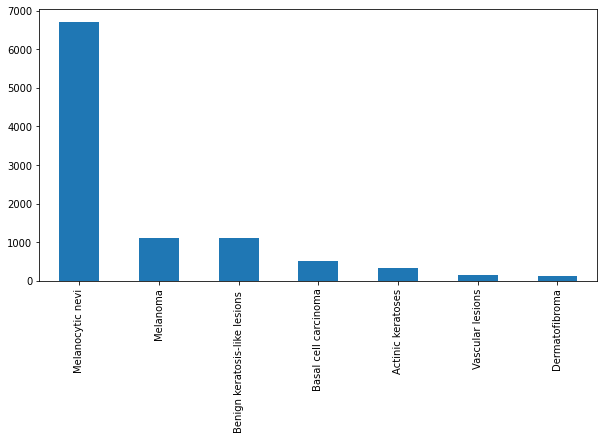

In [ ]:
# Looking at the distribution of 7 classes from the plot
fig, ax1 = plt.subplots(1, 1, figsize= (10, 5))
df['cell_type'].value_counts().plot(kind='bar', ax=ax1)

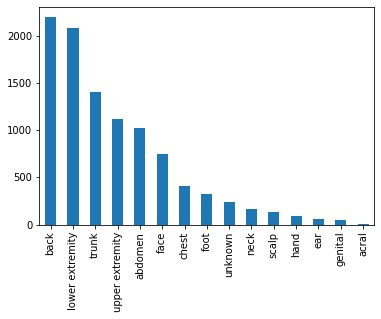

In [ ]:
#Plot to represent the where the infection has occured
df['localization'].value_counts().plot(kind='bar')

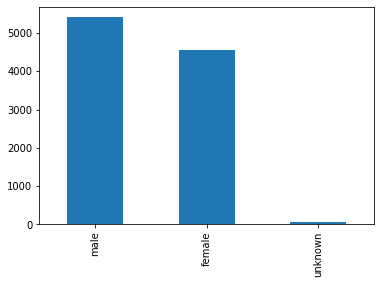

In [ ]:
#plot representing the gender
df['sex'].value_counts().plot(kind='bar')

###Loading the data and resizing the images

--Here,images will be loaded into the image column from the image path of image folder.

-- And the size/dimensions of the original image i.e.450 x 600 x3 which TensorFlow can’t handle so,it is reduced to 64 X 64

In [ ]:
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((64,64))))

In [ ]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,../content/HAM10000_images_part_1/ISIC_0027419...,Benign keratosis-like lesions,2,"[[[191, 152, 194], [191, 153, 195], [192, 149,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,../content/HAM10000_images_part_1/ISIC_0025030...,Benign keratosis-like lesions,2,"[[[23, 13, 23], [25, 14, 28], [37, 24, 46], [6..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,../content/HAM10000_images_part_1/ISIC_0026769...,Benign keratosis-like lesions,2,"[[[186, 129, 140], [192, 136, 151], [198, 143,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,../content/HAM10000_images_part_1/ISIC_0025661...,Benign keratosis-like lesions,2,"[[[24, 11, 19], [36, 20, 30], [64, 38, 50], [9..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,../content/HAM10000_images_part_2/ISIC_0031633...,Benign keratosis-like lesions,2,"[[[139, 95, 118], [158, 114, 138], [178, 133, ..."


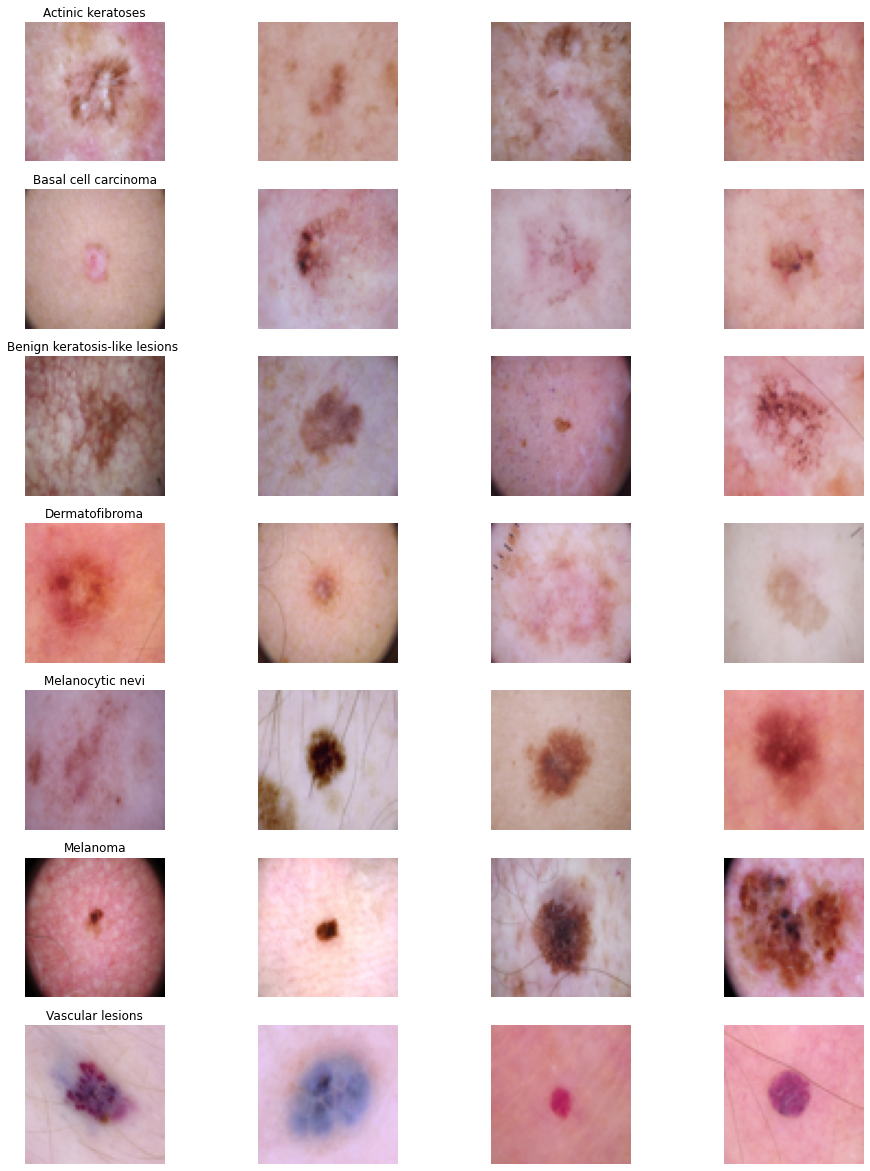

In [ ]:
##Displaying the images of reduced dimensions
import matplotlib.pyplot as plt
fig, m_axs = plt.subplots(7, 4, figsize = (4*4, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs,df.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(7, random_state=1).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

In [ ]:
##Segregating the features and targets from the data
features=df.drop(columns=['cell_type_idx'],axis=1)
target=df['cell_type_idx']

###Train and Test Split

In [ ]:
##Splitting the data into train and test
x_train1, x_test1, y_train1, y_test1 = train_test_split(features, target, test_size=0.20,random_state=2)

###Normailizing the data

In [ ]:
x_train = np.asarray(x_train1['image'].tolist())
x_test = np.asarray(x_test1['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)
## Using Z-score Normalization
x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [ ]:
##Performing one-hot encoding on the labels
y_train = to_categorical(y_train1, num_classes = 7)
y_test = to_categorical(y_test1, num_classes = 7)

In [ ]:
##Spliting the training and validation
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)  

In [ ]:
##Reshaping the images before fitting it into the model
x_train = x_train.reshape(x_train.shape[0], *(64, 64, 3))
x_test = x_test.reshape(x_test.shape[0], *(64, 64, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(64, 64, 3))

###Building the Model using CNN

In [ ]:
shape = (64, 64, 3)

classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), activation='relu',input_shape=shape))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPool2D(pool_size = (2, 2)))
classifier.add(Dropout(0.05))

classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2, 2)))
classifier.add(Dropout(0.10))

classifier.add(Flatten())

classifier.add(Dense(128, activation='relu'))
classifier.add(Dropout(0.15))
classifier.add(Dense(64, activation='relu'))

classifier.add(Dense(32, activation='relu'))
classifier.add(Dropout(0.20))

classifier.add(Dense(7, activation='softmax'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        36928     
                                                        

In [ ]:
###Setting an optimizer
classifier.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

###Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
                            featurewise_std_normalization=False, 
                            samplewise_std_normalization=False, 
                            rotation_range=10, 
                            zoom_range = 0.1,  
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=False,  
                            vertical_flip=False
                            )
datagen.fit(x_train)

###Fitting the model

In [ ]:
epochs = 50
batch_size = 10
history = classifier.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_validate,y_validate),
                              steps_per_epoch=x_train.shape[0] // batch_size)

<ipython-input-44-38bacfe1da87>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),


Epoch 1/50
721/721 [==============================] - 23s 19ms/step - loss: 1.0332 - accuracy: 0.6577 - val_loss: 0.8816 - val_accuracy: 0.6771
Epoch 2/50
721/721 [==============================] - 12s 17ms/step - loss: 0.9340 - accuracy: 0.6718 - val_loss: 0.9156 - val_accuracy: 0.6908
Epoch 3/50
721/721 [==============================] - 12s 16ms/step - loss: 0.9037 - accuracy: 0.6838 - val_loss: 0.8813 - val_accuracy: 0.7145
Epoch 4/50
721/721 [==============================] - 12s 17ms/step - loss: 0.8698 - accuracy: 0.6874 - val_loss: 0.7889 - val_accuracy: 0.7232
Epoch 5/50
721/721 [==============================] - 11s 16ms/step - loss: 0.8470 - accuracy: 0.6954 - val_loss: 0.7522 - val_accuracy: 0.7145
Epoch 6/50
721/721 [==============================] - 15s 20ms/step - loss: 0.8370 - accuracy: 0.7007 - val_loss: 0.7347 - val_accuracy: 0.7269
Epoch 7/50
721/721 [==============================] - 11s 15ms/step - loss: 0.8127 - accuracy: 0.7092 - val_loss: 0.7072 - val_accuracy:

###Evaluating the Model

In [ ]:
loss, accuracy = classifier.evaluate(x_test, y_test)
loss_v, accuracy_v = classifier.evaluate(x_validate, y_validate)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
classifier.save("classify.h5")


26/26 [==============================] - 0s 6ms/step - loss: 0.6838 - accuracy: 0.7855
Validation: accuracy = 0.785536  ;  loss_v = 0.683825
Test: accuracy = 0.763854  ;  loss = 0.695389


-- The accuracy of the model is 76.38%

###Plotting the Model

In [ ]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

<ipython-input-52-21a1cb06bcb9>:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
<ipython-input-52-21a1cb06bcb9>:17: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)


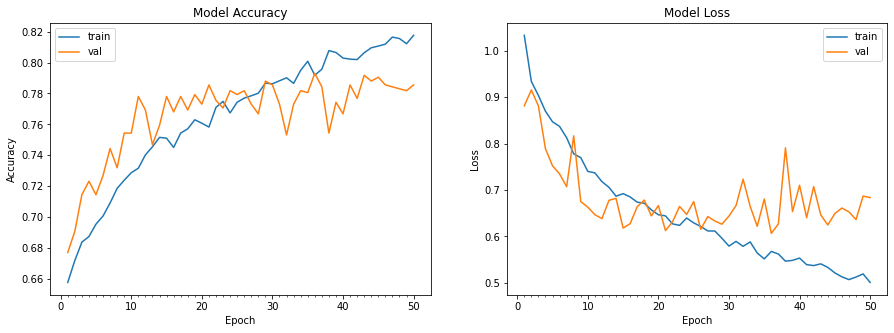

In [ ]:
plot_model_history(history)

- From the plots, we can see that the model accuracy has been improved and the loss has been reduced.

26/26 [==============================] - 0s 4ms/step


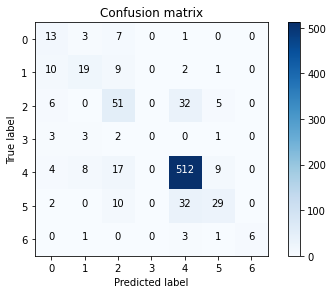

In [ ]:
###Plotting the Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    decoy = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > decoy else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Predicting the values from the validation dataset
Y_pred = classifier.predict(x_validate)
#Converting predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
#Converting validation observations to one hot vectors
Y_true = np.argmax(y_validate,axis = 1) 
#Computing the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

plot_confusion_matrix(confusion_mtx, classes = range(7)) 

-- From the above confusion matrix, we can say that the cancer type of number - 4  which is Melanocytic nevi has the highest number of correct prediction i.e., 512.